In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as py
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg
from IPython.display import display, Image
from matplotlib.pyplot import figure
import math

In [598]:
def import_tables(num_folder):
    main_df = {}
    for num_table in range (1,22):
        
        
#        print("table number:",num_table)
  
        f= open('train'+'/'+num_folder+'/SimpleTest/'+str(num_table)+'.csv')
        df=pd.read_csv(f)
        df=df.dropna() 
        df['X']=df['X'].astype(float)
        df[' Y']=df[' Y'].astype(float)
        df['Time']=df[' Time'].str.slice(3).astype(float)
        df['Time_Diff'] = df['Time'].diff()
        df['Y']= df[' Y']
        del df[' Y']
        del df[' Time']
        tempx=df['X']
        tempy=df['Y']
        main_df[num_table]=df

        

    return main_df

In [628]:
df1=import_tables('7556')

In [629]:
df1[1]

,X,Pressure,TiltX,TiltY,Time,Time_Diff,Y
0,1326.239058,0.191638,-3638.0,746.0,18.055352,NaN,670.702853
1,1322.710706,0.203357,-3638.0,746.0,18.070980,0.015628,672.230050
2,1318.497748,0.200671,-3638.0,746.0,18.086604,0.015624,672.598683
3,1313.547523,0.196765,-3638.0,746.0,18.102271,0.015667,672.493360
4,1305.911537,0.196765,-3638.0,746.0,18.117897,0.015626,672.230050
...,...,...,...,...,...,...,...
337,13.955422,0.672847,-2138.0,797.0,21.564834,0.015674,692.083612
338,13.639450,0.668452,-2138.0,797.0,21.580355,0.015521,692.188936
339,13.639450,0.664057,-2138.0,797.0,21.580355,0.000000,692.188936
340,13.639450,0.633539,-2138.0,797.0,21.611702,0.031347,692.188936


In [630]:
df1[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          342 non-null    float64
 1    Pressure  342 non-null    float64
 2    TiltX     342 non-null    float64
 3    TiltY     342 non-null    float64
 4   Time       342 non-null    float64
 5   Time_Diff  341 non-null    float64
 6   Y          342 non-null    float64
dtypes: float64(7)
memory usage: 21.4 KB


In [631]:
for i in range(1,len(df1)-1):
    df1[i].rename(columns = {'X':'X', ' Y':'Y' ,' Pressure':'Pressure' , ' TiltX':'TiltX' , ' TiltY':'TiltY' , ' Time': 'Time'}, inplace = True)

In [632]:
df['X_Diff'] = df['X'].diff()
df['Y_Diff'] = df['Y'].diff()
df['Slope'] = df['Y_Diff']/df['X_Diff']

<IPython.core.display.Javascript object>


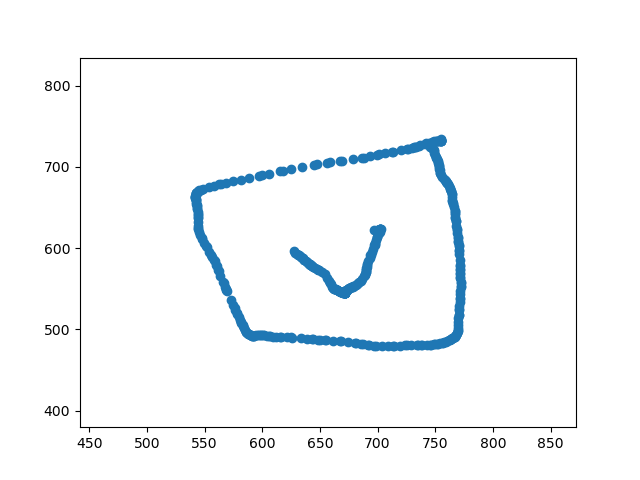

In [633]:
%matplotlib notebook
x = df['X']
y = df['Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df['Y'].min()-100 , df['Y'].max() + 100)
graph, = plt.plot([], [], 'o')
graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(df), interval=10)
plt.show()

In [634]:
def line_length(dist):
    dist = np.array(dist)
    return np.sum(dist)

In [635]:
def avg_pressure(pressures):
    pressures = np.array(pressures)
    return np.average(pressures)

In [636]:
def info(dataframe):
    table = dataframe[['X','Y']].copy()
    distances = []
    pressures = []
    lines_data = []
    avg_pressure
    handlift=0
    for i in range(len(table)-1):
        distance = math.sqrt(math.pow((dataframe['X'][i]-dataframe['X'][i+1]),2)
                                   + math.pow((dataframe['Y'][i]-dataframe['Y'][i+1]),2))
        distances.append(distance)
        pressures.append(dataframe['Pressure'][i])
        if ((distance > 15) and (dataframe['Time_Diff'][i+1]-dataframe['Time_Diff'][i]>0.04)):
            lines_data.append((line_length(distances), avg_pressure(pressures)))
            distances = []
            pressures = []
        if (dataframe['Time_Diff'][i+1]-dataframe['Time_Diff'][i]>0.04):
            handlift = handlift+1
    if (distances is not(None) and pressures is not(None)):
         lines_data.append((line_length(distances), avg_pressure(pressures)))
    return handlift, lines_data, len(lines_data)

# Number of hand lifts
# Number of lines and average pressure

In [637]:
def information(df):
    hand_lift, lines_d, num_of_lines = info(df)
    print('Hand Lifts: ' + str(hand_lift) + "\nNumber Of Lines: " + str(num_of_lines))
    print("Lines Length:")
    print(lines_d)

# We will check if the shape is closed or open:

In [638]:
def closed_or_open(df):
    index=2
    while index<len(df)-1 and (df['Time_Diff'][index+1]-df['Time_Diff'][index] <=0.04):
            index = index + 1
    sub_df = df.iloc[1:index+1].copy()
    xy_sub_df = sub_df[['X','Y']].copy()
    df_xy = df[['X','Y']].copy()
    for i in range(len(df_xy)-2):
        if df_xy['X'][i] == df_xy['X'][i+1] and df_xy['Y'][i] == df_xy['Y'][i+1] :
            df_xy.drop(i , axis=0 , inplace=True)
    for i in range(1,len(xy_sub_df)-2):
        if xy_sub_df['X'][i] == xy_sub_df['X'][i+1] and xy_sub_df['Y'][i] == xy_sub_df['Y'][i+1] :
            xy_sub_df.drop(i , axis=0 , inplace=True)
    duplicates = xy_sub_df[xy_sub_df.duplicated()]
    df_xy_duplicates = df_xy[df_xy.duplicated()]
    if(len(duplicates)>0):
        print("closed")
    elif len(df_xy_duplicates)>0:
        print("closed")
    else:
        print("open")

In [639]:
for i in range(1,len(df1)-2):
    print('-----------', i ,'-----------')
    information(df1[i])
    closed_or_open(df1[i])

----------- 1 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(1316.3869744997571, 0.5930485935155247)]
closed
----------- 2 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(190.05477911937007, 0.587700761132693)]
closed
----------- 3 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(1237.3467403511997, 0.39142297937052095)]
open
----------- 4 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(671.5031722064946, 0.6458650271243909)]
open
----------- 5 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(756.9452928146729, 0.6745358052887495)]
closed
----------- 6 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(990.2262021053721, 0.6655787712174096)]
closed
----------- 7 -----------
Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(336.1173545977713, 0.3849819883806248)]
open
----------- 8 -----------
Hand Lifts: 1
Number Of Lines: 2
Lines Length:
[(956.2666744810018, 0.590835469424144), (270.1415418696704, 0.6123052891757

<IPython.core.display.Javascript object>


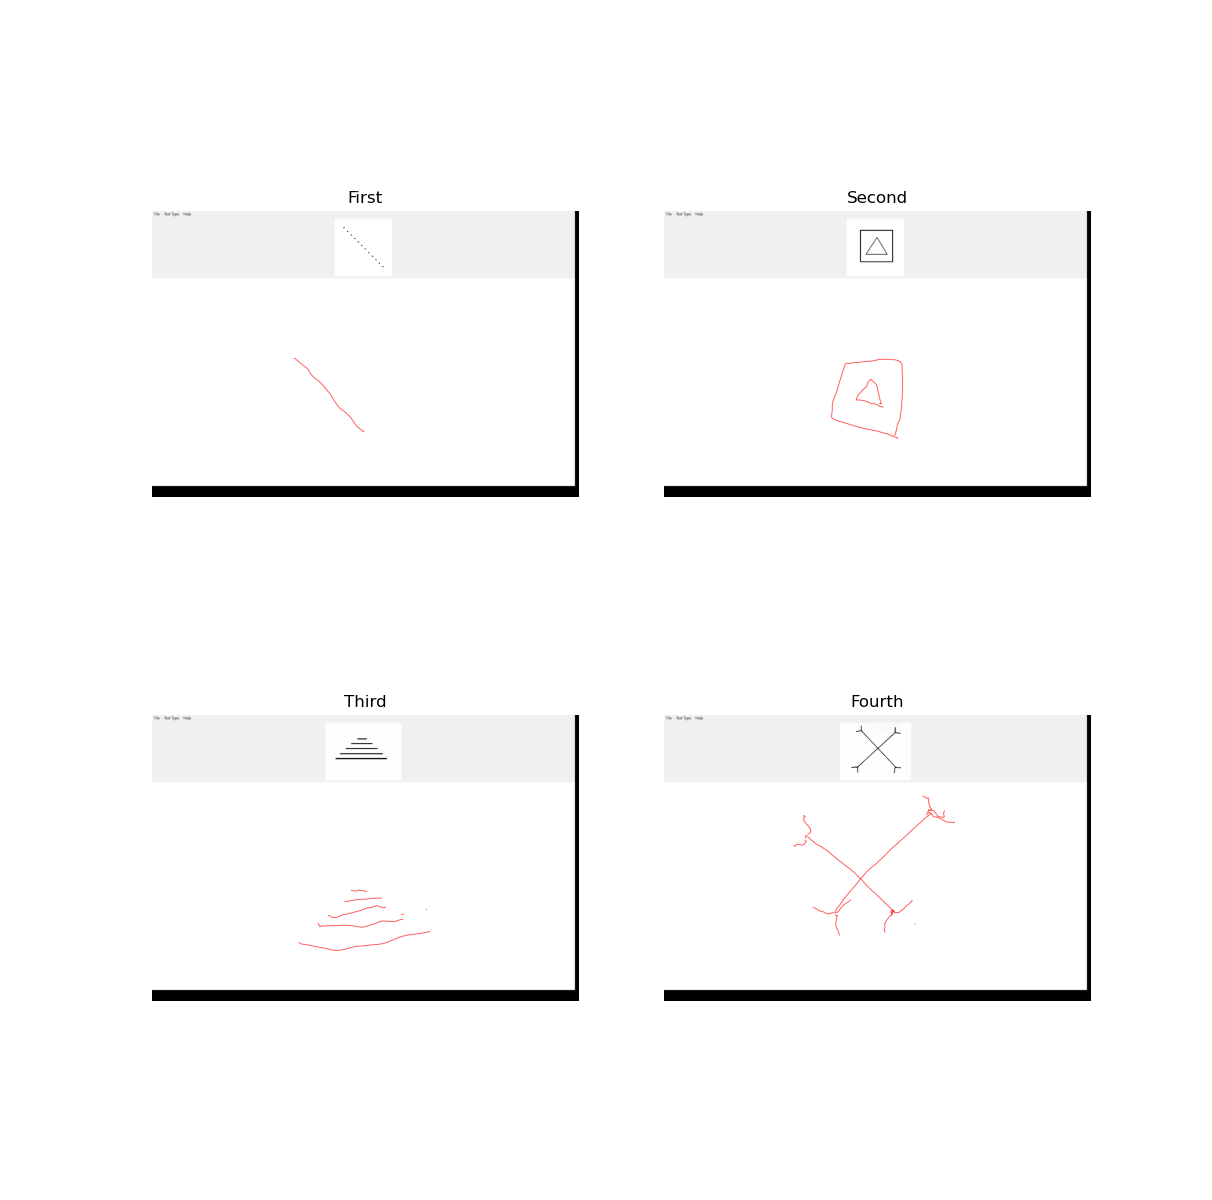

Text(0.5, 1.0, 'Fourth')

In [644]:
import cv2
  
# create figure
fig = plt.figure(figsize=(12, 12))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = cv2.imread(r'C:\Users\levi_\train\7556\SimpleTest\7.png')
Image2 = cv2.imread(r'C:\Users\levi_\train\7556\SimpleTest\8.png')
Image3 = cv2.imread(r'C:\Users\levi_\train\7556\SimpleTest\9.png')
Image4 = cv2.imread(r'C:\Users\levi_\train\7556\SimpleTest\10.png')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")